## import necessary libraries

In [1]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
from plotly import tools
plotly.offline.init_notebook_mode(connected=True)

In [2]:
def load_data(dir_path, img_size=(100,100)):
   
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        print(path)
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels


TRAIN_DIR = 'TRAIN/'
TEST_DIR = 'TEST/'
VAL_DIR = 'VAL/'
IMG_SIZE = (224,224)

X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)
X_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)
X_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)

  0%|          | 0/2 [00:00<?, ?it/s]

NO


 50%|█████     | 1/2 [00:00<00:00,  2.51it/s]

YES


  0%|          | 0/2 [00:00<?, ?it/s]

193 images loaded from TRAIN/ directory.
NO
YES
10 images loaded from TEST/ directory.
NO
YES


100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

50 images loaded from VAL/ directory.


## setting  binary values to y variable

In [3]:


y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

In [4]:


def plot_samples(X, y, labels_dict, n=50):
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()

## potting the count distribution of input images available

In [5]:

y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)

fig = go.Figure(data, layout)
iplot(fig)

In [6]:
plot_samples(X_train, y_train, labels, 30)

## Data Augmentation 

In [7]:
from keras.preprocessing.image import ImageDataGenerator
augdatagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

Using TensorFlow backend.


## Viewing the Augmented Images 

In [8]:

plt.imshow(X_train[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv2.cv2.imread('preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

## VIewing the Orginal train image dataset 

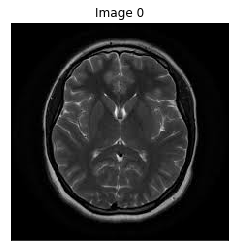

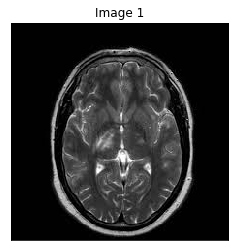

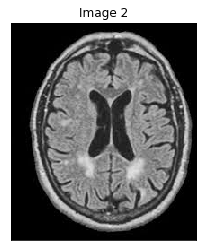

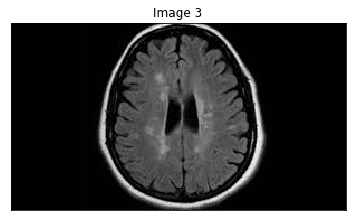

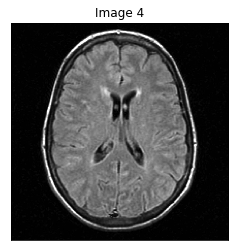

In [9]:
for i in range(5):
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.title('Image {}'.format(i))
    plt.show()

# Training the Dataset on Transfer Learning , VGG16 CNN 

In [10]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model  
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Conv2D , Activation , MaxPooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import RMSprop , Adam
import numpy as np
import matplotlib.pyplot as plt
import fnmatch
import os 
import cv2
import random
import matplotlib.image as mpimg

import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.datasets import cifar10
from keras.engine import Model
from keras.applications import vgg16 as vgg
from keras.applications import  inception_v3, resnet50, mobilenet
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.preprocessing import image

#ignore all Warnings
import warnings; warnings.simplefilter('ignore')

## Plotting individual class image sample 

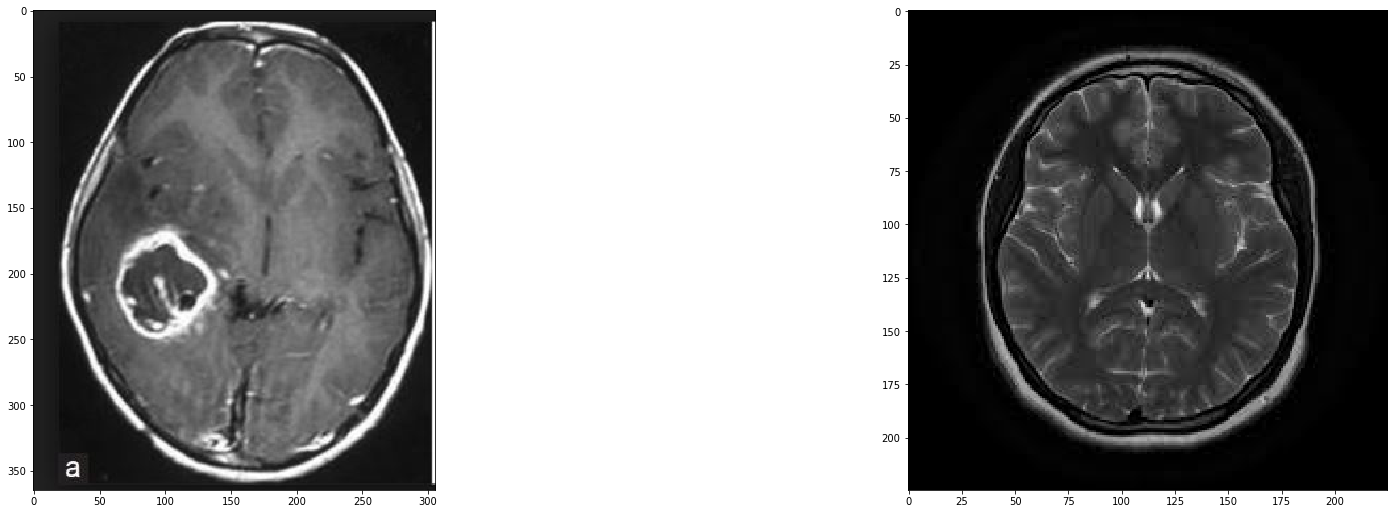

In [11]:
YES_dir = 'TRAIN/YES'
YES = ['TRAIN/YES/{}'.format(i) for i in os.listdir(YES_dir) ] 

NO_dir = 'TRAIN/NO'
NO = ['TRAIN/NO/{}'.format(i) for i in os.listdir(NO_dir) ]




all=[]
all.append(YES)
all.append(NO)


import matplotlib.image as mpimg
i=1
fig=plt.figure(figsize=(30,30))
for ima in all[0:6]:
    img=mpimg.imread(ima[0])
    plt.subplot(3,2,i)
    plt.imshow(img)
    i=i+1

## setting parameters on training Data 

In [12]:
img_width, img_height = IMG_SIZE
train_data_dir = 'TRAIN'
validation_data_dir='VAL'
test_data_dir='TEST'

batch_size = 32
epochs = 20

## Building VGG16 CNN Model  

## Using imagenet pretrained weights 

In [13]:
vgg_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(img_width, img_height, 3))

for layer in vgg_model.layers[:-2]:
    layer.trainable = False

W0224 16:48:52.071218 140371544041280 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0224 16:48:52.097696 140371544041280 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0224 16:48:52.103186 140371544041280 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0224 16:48:52.179589 140371544041280 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0224 16:48:52.

## Freezing all layers and keep last 2 layers trainable 

In [14]:
vgg_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(img_width, img_height, 3))

for layer in vgg_model.layers[:-2]:
    layer.trainable = False
    
    
for layer in vgg_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7faa6eb443c8> False
<keras.layers.convolutional.Conv2D object at 0x7faa6eb444a8> False
<keras.layers.convolutional.Conv2D object at 0x7faa6eb44470> False
<keras.layers.pooling.MaxPooling2D object at 0x7faa6eacc400> False
<keras.layers.convolutional.Conv2D object at 0x7faa6eacceb8> False
<keras.layers.convolutional.Conv2D object at 0x7faa6eb00588> False
<keras.layers.pooling.MaxPooling2D object at 0x7faa6eb00ef0> False
<keras.layers.convolutional.Conv2D object at 0x7faa6eaa0cc0> False
<keras.layers.convolutional.Conv2D object at 0x7faa6ea51320> False
<keras.layers.convolutional.Conv2D object at 0x7faa6ea715c0> False
<keras.layers.pooling.MaxPooling2D object at 0x7faa6ea0eb00> False
<keras.layers.convolutional.Conv2D object at 0x7faa6ea0eb70> False
<keras.layers.convolutional.Conv2D object at 0x7faa6ea42668> False
<keras.layers.convolutional.Conv2D object at 0x7faa6e9e1da0> False
<keras.layers.pooling.MaxPooling2D object at 0x7faa6e9f7e10>

## Adding the Base VGG16 Model and building last layers 

In [15]:
model = Sequential()
 
    
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
 
model.summary()

W0224 16:48:56.384526 140371544041280 deprecation.py:506] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 40,407,874
Trainable params: 28,052,994
Non-trainable params: 12,354,880
_________________________________________________________________


## Loading train test and validation Data with data Augmentation 

In [16]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_batchsize = 100
val_batchsize = 10

In [18]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=train_batchsize,
        class_mode='categorical')

Found 193 images belonging to 2 classes.


In [19]:
test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=train_batchsize,
        class_mode='categorical')

Found 10 images belonging to 2 classes.


In [20]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=val_batchsize,
        class_mode='categorical')

Found 50 images belonging to 2 classes.


## Compiling model with loss function , optimizers 

## Training the model for 15 epochs 

In [21]:
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)


training = model.fit_generator(
      train_generator,
      steps_per_epoch=5,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=100,
      verbose=1)   

model.save('CNN_VGGNET.h5')

W0224 16:48:56.851722 140371544041280 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0224 16:48:56.873500 140371544041280 deprecation.py:323] From /home/stephen/.local/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
5/5 [==============================] - 34s 7s/step - loss: 2.1332 - acc: 0.5723 - val_loss: 0.7747 - val_acc: 0.7200
Epoch 2/20
5/5 [==============================] - 19s 4s/step - loss: 0.6119 - acc: 0.6734 - val_loss: 0.8758 - val_acc: 0.6200
Epoch 3/20
5/5 [==============================] - 23s 5s/step - loss: 0.5660 - acc: 0.7109 - val_loss: 0.4720 - val_acc: 0.7900
Epoch 4/20
5/5 [==============================] - 22s 4s/step - loss: 0.5554 - acc: 0.7300 - val_loss: 0.4314 - val_acc: 0.8100
Epoch 5/20
5/5 [==============================] - 21s 4s/step - loss: 0.5009 - acc: 0.7630 - val_loss: 0.4862 - val_acc: 0.7800
Epoch 6/20
5/5 [==============================] - 21s 4s/step - loss: 0.3412 - acc: 0.8523 - val_loss: 0.5675 - val_acc: 0.7200
Epoch 7/20
5/5 [==============================] - 22s 4s/step - loss: 0.4527 - acc: 0.7763 - val_loss: 0.4271 - val_acc: 0.8300
Epoch 8/20
5/5 [==============================] - 20s 4s/step - loss: 0.3118 - acc: 0.8807 - val_loss: 0

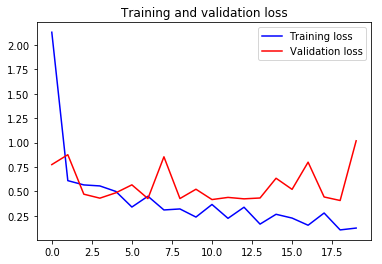

In [22]:
acc = training.history['acc']
val_acc = training.history['val_acc']
loss = training.history['loss']
val_loss = training.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()